In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [64]:
df = pd.read_csv('/content/shrink_ray_dataset.csv')
df.shape

(200, 2)

In [65]:
df


,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00
...,...,...
195,293.97,89.62
196,295.48,94.92
197,296.98,88.65
198,298.49,90.79


In [66]:

df.describe()

,Power,Shrinkage
count,200.000000,200.000000
mean,150.000000,45.274700
std,87.254773,28.252884
min,0.000000,0.000000
25%,75.002500,20.435000
50%,150.000000,43.855000
75%,224.997500,70.595000
max,300.000000,94.920000


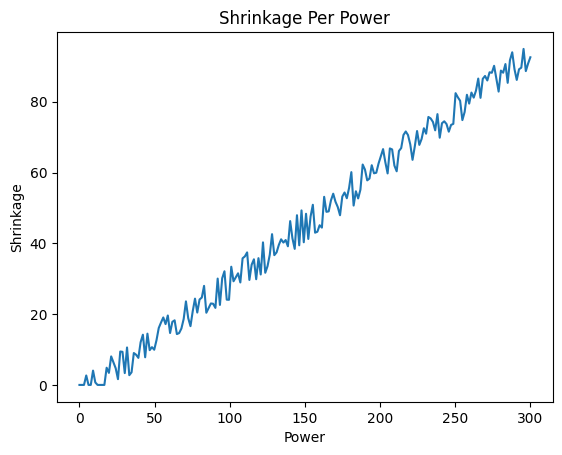

In [67]:
plt.title("Shrinkage Per Power")
plt.xlabel("Power")
plt.ylabel("Shrinkage")

plt.plot(df['Power'],df['Shrinkage'])

In [68]:
X = df[['Power']]
y = df[['Shrinkage']]

print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


In [69]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
y_train.shape

(160, 1)

In [70]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import mean_squared_error
lr = LinearRegression()

In [71]:
lr.fit(X_train,y_train)

LinearRegression()

In [72]:
train_pred = lr.predict(X_train)
train_pred.shape

(160, 1)

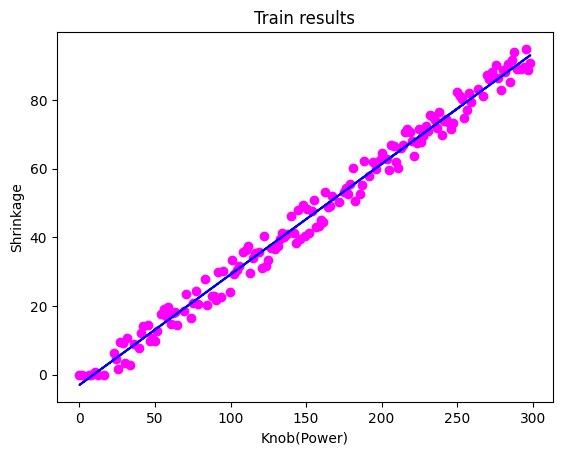

In [73]:
plt.scatter(X_train, y_train, color = "magenta")
plt.plot(X_train, train_pred , color = "blue")
plt.title("Train results")
plt.xlabel("Knob(Power)")
plt.ylabel("Shrinkage")

plt.show()


In [74]:
training_score = sm.r2_score(train_pred,y_train)
print(f"Training score: {training_score}")

Training score: 0.9882444471317329


In [75]:
test_pred = lr.predict(X_test)

In [76]:

test_score = sm.r2_score(test_pred,y_test)
print(f"Test score: {test_score}")
mse = mean_squared_error(y_test,test_pred)
print(f"mean squared error: {mse}")


Test score: 0.9898912521341914
mean squared error: 9.124797149393345


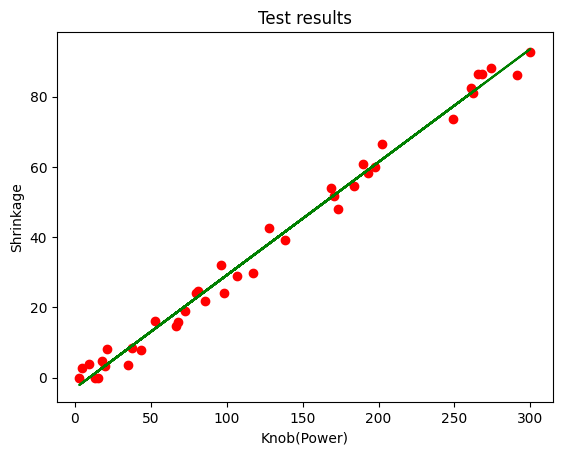

In [77]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, test_pred, color = "green")
plt.title("Test results")
plt.xlabel("Knob(Power)")
plt.ylabel("Shrinkage")

plt.show()

In [87]:
#predict the value of shrinkage in a 2D array with approximate  range of Knob
#method 1
LowKnobPosition = 250
HighKnobPosition = 300
DesiredShrinkage = 85
lowerShrinkage = lr.predict([[LowKnobPosition]])
print(lowerShrinkage)
HigherShrinkage = lr.predict([[HighKnobPosition]])
print(HigherShrinkage)
Knob_position = (DesiredShrinkage - lowerShrinkage)*(HighKnobPosition - LowKnobPosition)/(HigherShrinkage - lowerShrinkage)+LowKnobPosition

print(f"Knob position for 85% shrinkage : {Knob_position}")


[[77.47950047]]
[[93.57633448]]
Knob position for 85% shrinkage : [[273.36018227]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [88]:
#method 2 more accurate
meannP = np.mean(df['Power'])
meannS = np.mean(df['Shrinkage'])
stdP= np.std(df['Power'])
stdS = np.std(df['Shrinkage'])
corCoef= np.corrcoef(df['Power'],df['Shrinkage'])
print(meannP,meannS,stdP,stdS)
print(corCoef[0][1])

predicted_knob = (((corCoef[0][1] * stdP) / stdS) * (85-meannS)) + meannP
print(f"predicted Knob for 85% shrinkage:{predicted_knob}")

150.0 45.2747 87.03636222866854 28.182163258167392
0.9944669225056322
predicted Knob for 85% shrinkage:272.0067707789781
